In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', timeout_ms=3000000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Bengali Fish Recognizer/

/content/drive/MyDrive/Bengali Fish Recognizer


In [ ]:
!pip install grad-cam fastai fastbook nbdev

In [ ]:
import cv2
import torch
from fastai.vision.all import *
from torchvision import transforms
from torchvision.io import read_image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
# image_path = "test images/unknown_01.jpg"

image_path = "test images/unknown_10.jpg"

In [ ]:
image = cv2.imread(image_path)

In [ ]:
image = cv2.resize(image, dsize=(224, 224),
      interpolation=cv2.INTER_CUBIC)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
img_tensor = transforms.ToTensor()(image)

In [ ]:
img_tensor = img_tensor.reshape(1,3,224,224)

In [ ]:
# model = load_learner("models/ResNet50_2.pkl")

# model = load_learner("models/DenseNet121_2.pkl")

model = load_learner("models/VGG19_2.pkl")

In [ ]:
pytorch_model = model.eval()

In [ ]:
pytorch_model(img_tensor).argmax()

tensor(18)

In [ ]:
label, _, probs = model.predict(image_path)
label

'Telapia'

In [ ]:
probs.argmax()

tensor(18)

In [ ]:
type(probs.argmax())

torch.Tensor

In [ ]:
layers = list(model.named_modules())

In [ ]:
layers

[('',
  Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): MaxPool2d(k

In [ ]:
len(layers), layers[len(layers)-19][1]

(68, Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))

In [ ]:
# For Resnet50
# target_layers = [layers[len(layers)-20][1]]

# For DenseNet-121
# target_layers = [layers[len(layers)-14][1]]

# For VGG-19
target_layers = [layers[len(layers)-19][1]]


In [ ]:
cam = GradCAM(model = pytorch_model, target_layers = target_layers)

In [ ]:
targets = [ClassifierOutputTarget(probs.argmax())]

In [ ]:
grayscale_cam = cam(input_tensor = img_tensor, targets = targets)

In [ ]:
grayscale_cam = grayscale_cam[0, :]

In [ ]:
type(image), type(grayscale_cam*255)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# from PIL import Image

In [ ]:
# im1 = Image.fromarray(image)
# cam_mask = Image.fromarray(grayscale_cam*255)

In [ ]:
# cam_mask = Image.fromarray(grayscale_cam, "RGB")

In [ ]:
# cam_mask

In [ ]:
# im1.paste(cam_mask, mask = cam_mask.convert('L'))

In [ ]:
# im1

In [ ]:
# cv2.imshow(image)

In [ ]:
# cv2.addWeighted(image, 0.4, grayscale_cam*255, 0.1, 0)

In [ ]:
# image = cv2.imread(image_path)

In [ ]:
# image = cv2.resize(
#       image,
#       dsize=(224, 224),
#       interpolation=cv2.INTER_CUBIC)

In [ ]:
# image.shape

In [ ]:
# plt.imshow(image)

In [ ]:
# model_name = "resnet50"

# model_name = "densenet121"

model_name = "vgg19"

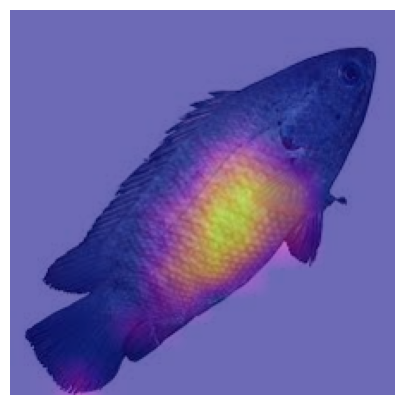

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.imshow(grayscale_cam*255, cmap="plasma", alpha=0.6)
plt.axis('off')
# plt.savefig(f'xaiImages/{model_name}_correct.png')
plt.savefig(f'xaiImages/{model_name}_mis.png')
plt.show()